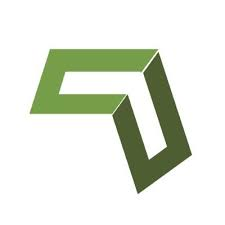

# Anomaly Detection Project
***

## Executive Summary
#### Overview

Presented with a set of questions regarding Code Up's cohorts' online traffic patterns for their use of class lessons and documentation, we are to explore the cohorts' web logs to discover answers to the questions given to us.  Using a SQL database and a .csv containing web logs and cohort data, we will be analyzing the data to find how the cohorts accessed the class lessons online.  

#### Project Goals
- Explore, visualize, and analyze data to discover answers to the questions given to us.
- Create an email in response to the request included below containing findings. 
- Create a single Executive Summary-like slide summarizing most important findings
- Create a Jupyter Notebook outlining work done to answer questions
- Answer at least 5 of the 8 questions asked in the request including:
    - 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
    - 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
    - 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
    - 4.  Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
    - 5.  At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
    - 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
    - 7.  Which lessons are least accessed?
    - 8.  Anything else I should be aware of?




#### Outline of Process

The plan for this project is to do the following:
- Acquire cohort schedule info from SQL database and join with cohorts.csv sent to us. 
- Prepare data by dropping columns, renaming columns, handling null values and creating new columns.
- Explore data by visualizing and analyzing data.
- Create questions based off questions sent to us and explore data for answers.
- Come up with conclusions and gather and notate findings.
- Create email and Google Slide with responses to questions and key findings

#### Conclusion & Key Findings




*** 
Project Scenario from Google Assignment

Hello,

I have some questions for you that I need to be answered before the board meeting Friday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?


Thank you

***

Other info:

* To turn in your project, email datascience@codeup.com with the subject line "Anomaly Detection Project"
-  To get 100 on this project you only need to answer 5 out of the 7 questions (along with the other deliverables listed below i.e. slide, your notebook, etc).
-  Submit a link to a final notebook on GitHub that asks and answers questions - document the work you do to justify findings
-  Compose an email with the answers to the questions/your findings, and in the email, include the link to your notebook in GitHub and attach your slide.
-  You will not present this, so be sure that the details you need your leader to convey/understand are clearly communicated in the email.
-  Your slide should be like an executive summary and be in form to present.
-  Continue to use best practices of acquire.py, prepare.py, etc.
-  Since there is no modeling to be done for this project, there is no need to split the data into train/validate/test
-  The cohort schedule is in the SQL database, and alumni.codeup.com has info as well.

# Acquire

We were given a .csv file containing cohorts data.  Will read that into a dataframe to explore.

In [1]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import custom libraries
import acquire
import prepare

In [2]:
df_csv = pd.read_csv('cohorts.csv')

In [3]:
df_csv.head()

,cohort_id,name,start_date,end_date,program_id
0,1,Arches,2014-02-04,2014-04-22,1
1,2,Badlands,2014-06-04,2014-08-22,1
2,3,Carlsbad,2014-09-04,2014-11-05,1
3,4,Denali,2014-10-20,2015-01-18,1
4,5,Everglades,2014-11-18,2015-02-24,1


In [4]:
df_csv.shape

(46, 5)

In [5]:
df_csv.info

<bound method DataFrame.info of     cohort_id        name  start_date    end_date  program_id
0           1      Arches  2014-02-04  2014-04-22           1
1           2    Badlands  2014-06-04  2014-08-22           1
2           3    Carlsbad  2014-09-04  2014-11-05           1
3           4      Denali  2014-10-20  2015-01-18           1
4           5  Everglades  2014-11-18  2015-02-24           1
5           6    Franklin  2015-02-03  2015-05-26           1
6           7     Glacier  2015-06-05  2015-10-06           1
7           8     Hampton  2015-09-22  2016-02-06           1
8           9      Apollo  2015-03-30  2015-07-29           4
9          10      Balboa  2015-11-03  2016-03-11           4
10         11         Ike  2016-01-20  2016-05-12           1
11         12      Joshua  2016-03-08  2016-06-30           1
12         13       Kings  2016-05-23  2016-09-15           1
13         14      Lassen  2016-07-18  2016-11-10           1
14         15     Mammoth  2016-09-26 

- It looks like we have the Code Up cohorts names, dates started and date ended.

We will acquire data from the curriculum logs DB using SQL queries and our acquire.py

In [6]:
df = acquire.get_cohort_log_data()

In [7]:
df.head()

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:36:54,toc,717,NaN,136.50.102.126
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:36:59,javascript-i/introduction/primitive-types,717,NaN,136.50.102.126
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:37:31,javascript-i/introduction/operators,717,NaN,136.50.102.126
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:38:25,javascript-i/introduction/variables,717,NaN,136.50.102.126
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:38:43,javascript-i/introduction/working-with-data-ty...,717,NaN,136.50.102.126


In [8]:
df.shape

(900223, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          847330 non-null  float64
 1   name        847330 non-null  object 
 2   slack       847330 non-null  object 
 3   start_date  847330 non-null  object 
 4   end_date    847330 non-null  object 
 5   created_at  847330 non-null  object 
 6   updated_at  847330 non-null  object 
 7   deleted_at  0 non-null       float64
 8   program_id  847330 non-null  float64
 9   date        900223 non-null  object 
 10  time        900223 non-null  object 
 11  path        900222 non-null  object 
 12  user_id     900223 non-null  int64  
 13  cohort_id   847330 non-null  float64
 14  ip          900223 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 109.9+ MB


In [10]:
df.tail()

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip
900218,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,12:13:18,javascript-i/testing-user-functions,969,139.0,107.77.169.64
900219,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,12:31:48,javascript-i,969,139.0,107.77.169.64
900220,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,12:31:58,javascript-i/javascript-with-html,969,139.0,107.77.169.64
900221,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,12:32:01,javascript-i/testing-user-functions,969,139.0,107.77.169.64
900222,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,13:14:10,/,970,139.0,172.56.14.200


- Our dataframe returns the data from the curriculum logs for all cohorts at Code Up.

## Prepare

Now that we've acquired our data, let's look for nulls.

In [11]:
df.isna().sum()

id             52893
name           52893
slack          52893
start_date     52893
end_date       52893
created_at     52893
updated_at     52893
deleted_at    900223
program_id     52893
date               0
time               0
path               1
user_id            0
cohort_id      52893
ip                 0
dtype: int64

In [12]:
acquire.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
id,52893,5.875544
name,52893,5.875544
slack,52893,5.875544
start_date,52893,5.875544
end_date,52893,5.875544
created_at,52893,5.875544
updated_at,52893,5.875544
deleted_at,900223,100.000000
program_id,52893,5.875544
date,0,0.000000


In [13]:
acquire.nulls_by_row(df)

,num_cols_missing,percent_cols_missing,index
0,1,6.666666666666667,847329
1,2,13.333333333333334,1
2,10,66.66666666666666,52893


In [14]:
df[df.name.isna() & df.program_id.isna()]

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:36:54,toc,717,NaN,136.50.102.126
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:36:59,javascript-i/introduction/primitive-types,717,NaN,136.50.102.126
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:37:31,javascript-i/introduction/operators,717,NaN,136.50.102.126
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:38:25,javascript-i/introduction/variables,717,NaN,136.50.102.126
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:38:43,javascript-i/introduction/working-with-data-ty...,717,NaN,136.50.102.126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-08,10:19:19,java-ii/inheritance-and-polymorphism,48,NaN,216.177.189.26
52889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-08,10:19:20,java-ii/interfaces-and-abstract-classes,48,NaN,216.177.189.26
52890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-08,15:29:32,/,362,NaN,70.123.200.145
52891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-09,08:01:30,/,367,NaN,216.180.182.238


#### Dropping nulls since they do not have a cohort associated to them and making a cleaner data frame.  Will look into nulls later. Will add code to drop nulls in prepare.py.

In [17]:
df = prepare.prepare_data()
df.head()

,Unnamed: 0,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,path,user_id,cohort_id,ip,program_type
0,52893,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:13,/,402,1.0,71.78.236.131,php
1,52894,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:28,java-i,402,1.0,71.78.236.131,php
2,52895,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:35,java-i/syntax-types-and-variables,402,1.0,71.78.236.131,php
3,52896,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:40,html-css,402,1.0,71.78.236.131,php
4,52897,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:56:01,html-css/elements,402,1.0,71.78.236.131,php


In [18]:
df.isna().sum()

Unnamed: 0      0
id              0
name            0
slack           0
start_date      0
end_date        0
created_at      0
updated_at      0
program_id      0
date            0
time            0
path            0
user_id         0
cohort_id       0
ip              0
program_type    0
dtype: int64

- Nulls have been removed

In [19]:
#Look at prepped dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847329 entries, 0 to 847328
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    847329 non-null  int64  
 1   id            847329 non-null  float64
 2   name          847329 non-null  object 
 3   slack         847329 non-null  object 
 4   start_date    847329 non-null  object 
 5   end_date      847329 non-null  object 
 6   created_at    847329 non-null  object 
 7   updated_at    847329 non-null  object 
 8   program_id    847329 non-null  float64
 9   date          847329 non-null  object 
 10  time          847329 non-null  object 
 11  path          847329 non-null  object 
 12  user_id       847329 non-null  int64  
 13  cohort_id     847329 non-null  float64
 14  ip            847329 non-null  object 
 15  program_type  847329 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 103.4+ MB


In [16]:
df.columns

Index(['id', 'name', 'slack', 'start_date', 'end_date', 'created_at',
       'updated_at', 'deleted_at', 'program_id', 'date', 'time', 'path',
       'user_id', 'cohort_id', 'ip'],
      dtype='object')

In [15]:
#Look at the different counts per each program ID
df.program_id.value_counts()

2.0    713365
3.0    103412
1.0     30548
4.0         5
Name: program_id, dtype: int64

In [21]:
df.program_type.value_counts()

java            713365
data_science    103411
php              30548
front_end            5
Name: program_type, dtype: int64

In [22]:
df.path.value_counts()

/                                          45854
javascript-i                               18203
toc                                        17591
search/search_index.json                   17534
java-iii                                   13166
                                           ...  
examples/bootstrap/pizza.pn                    1
further-reading/javascript/array-splice        1
SVM_NLP                                        1
students/468/notes                             1
%20https://github.com/RaulCPena                1
Name: path, Length: 2224, dtype: int64

- Created a new column with description of program type for easier readability
- We have 52,893 nulls, and dropped them in our prepare.py
- Dropped 'deleted_at' column because no entries have a value, all are null, which means no web logs have been deleted

## Explore

Let's dig into the data and see what we find!

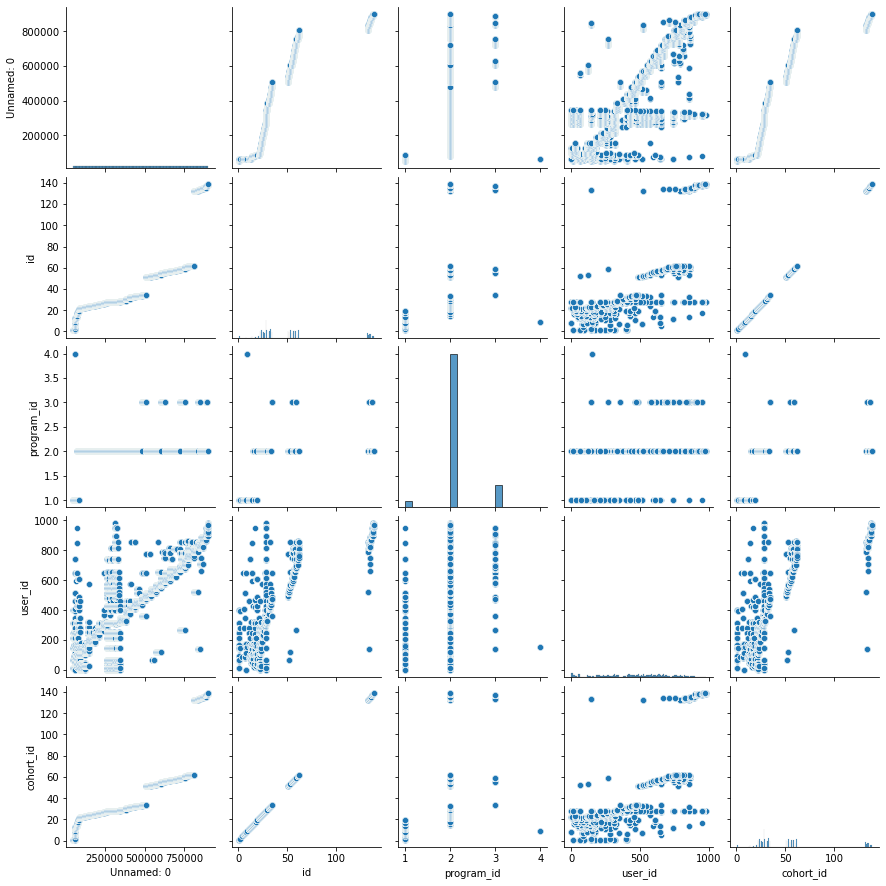

In [23]:
#Create a pair plot to see visual relationships between numeric variables
sns.pairplot(df)

In [24]:
#Combine date and time columns into one date-time column to use for indexing
df = df.set_index(pd.to_datetime(df.date + ' ' + df.time))

<AxesSubplot:title={'center':'Which hours was the most active?'}>

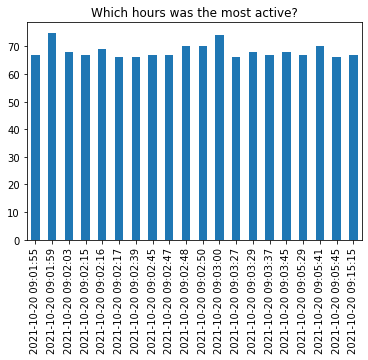

In [25]:
df.time.value_counts().head(20).sort_index().plot.bar(title='Which hours was the most active?')

<AxesSubplot:title={'center':'Which program types are the most popular?'}>

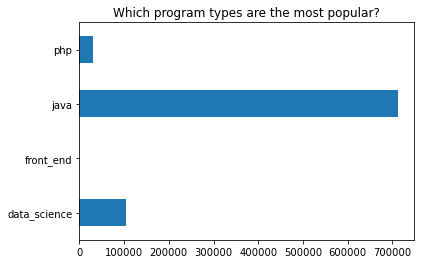

In [26]:
df.program_type.value_counts().sort_index().plot.barh(title="Which program types are the most popular?")

<AxesSubplot:title={'center':'Which cohorts are the most popular?'}>

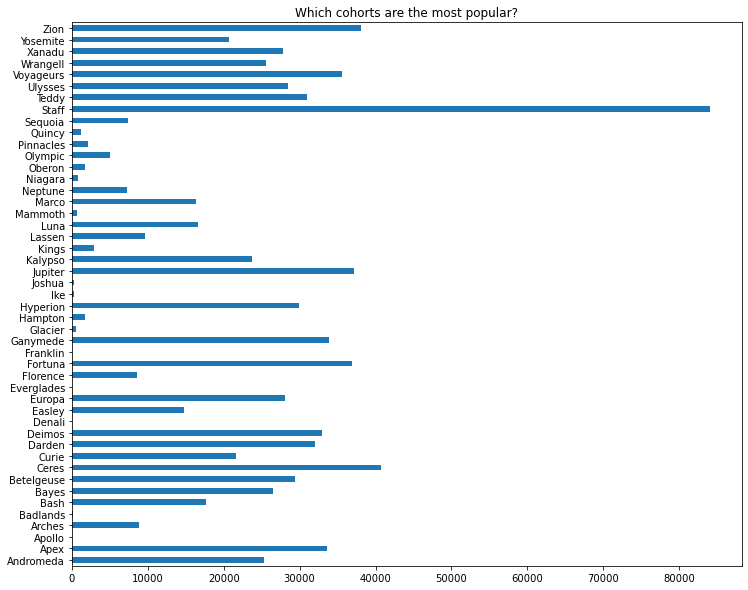

In [27]:
fig, ax = plt.subplots(figsize=(12,10))
df.name.value_counts().sort_index().plot.barh(title="Which cohorts are the most active online?")

#### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

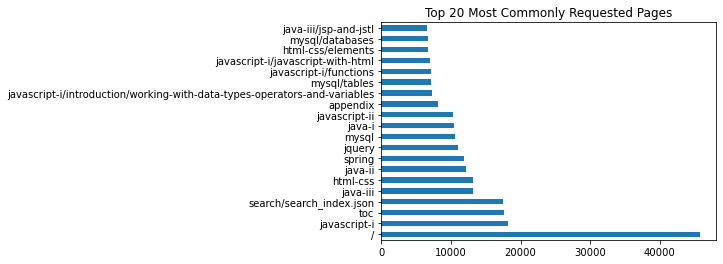

In [28]:
df.path.value_counts().head(20).plot.barh(
    title='Top 20 Most Commonly Requested Pages');

- '/', which is the Code Up curriculum home page, is the most active.

#### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [29]:
#fig, ax = plt.subplots(figsize=(8,6))
#df.groupby('name').plot(kind='bar', ax=ax)

#### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

- I will need to check students' start and end date and see how often they referenced the curriculum

#### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [36]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'slack', 'start_date', 'end_date',
       'created_at', 'updated_at', 'program_id', 'date', 'time', 'path',
       'user_id', 'cohort_id', 'ip', 'program_type'],
      dtype='object')

In [38]:
#Let's take a look at IP counts
id_counts = df.groupby(['id'])['date','name','path'].nunique()
id_counts

,date,name,path
id,,,
1.0,278,1,342
2.0,12,1,44
4.0,1,1,4
5.0,1,1,1
6.0,12,1,45
7.0,46,1,143
8.0,162,1,278
9.0,1,1,4
11.0,18,1,95


In [40]:
cohort_counts = df.groupby(['name'])['path','id','date'].nunique()

cohort_counts

,path,id,date
name,,,
Andromeda,366,1,447
Apex,273,1,386
Apollo,4,1,1
Arches,342,1,278
Badlands,44,1,12
Bash,275,1,252
Bayes,533,1,512
Betelgeuse,334,1,430
Ceres,301,1,466


In [42]:
first_access = df.groupby(['id'])['date'].min()
first_access

id
1.0      2018-01-26
2.0      2018-03-19
4.0      2018-02-04
5.0      2020-05-06
6.0      2018-10-16
7.0      2018-01-31
8.0      2018-01-26
9.0      2018-03-22
11.0     2018-05-07
12.0     2018-02-15
13.0     2018-01-26
14.0     2018-01-28
15.0     2018-01-30
16.0     2018-01-26
17.0     2018-02-15
18.0     2018-01-26
19.0     2018-01-26
21.0     2018-01-26
22.0     2018-01-26
23.0     2018-03-05
24.0     2018-05-29
25.0     2018-07-23
26.0     2018-09-17
27.0     2018-11-05
28.0     2018-12-06
29.0     2019-01-22
31.0     2019-03-18
32.0     2019-05-29
33.0     2019-07-15
34.0     2019-08-20
51.0     2019-09-16
52.0     2019-11-04
53.0     2020-01-13
55.0     2020-02-03
56.0     2020-02-24
57.0     2020-03-23
58.0     2020-05-26
59.0     2020-07-13
61.0     2020-07-20
62.0     2020-09-21
132.0    2020-11-03
133.0    2020-12-08
134.0    2020-12-07
135.0    2021-01-26
137.0    2021-03-15
138.0    2021-03-15
139.0    2021-04-12
Name: date, dtype: object

In [43]:
id_by_first_access_date = pd.DataFrame({'first_access_date': first_access}\
                                      ).reset_index().groupby('first_access_date').count()
id_by_first_access_date

,id
first_access_date,
2018-01-26,8
2018-01-28,1
2018-01-30,1
2018-01-31,1
2018-02-04,1
2018-02-15,2
2018-03-05,1
2018-03-19,1
2018-03-22,1


In [44]:
id_by_first_access_date.index = pd.to_datetime(id_by_first_access_date.index)

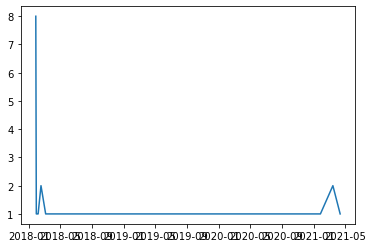

In [45]:
plt.plot(id_by_first_access_date)
plt.show()

#### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [46]:
page_views = df.groupby(['id'])['path'].agg(['count', 'nunique'])
page_views

,count,nunique
id,,
1.0,8890,342
2.0,93,44
4.0,4,4
5.0,1,1
6.0,72,45
7.0,598,143
8.0,1712,278
9.0,5,4
11.0,253,95


In [48]:
# Scaler import
from sklearn.preprocessing import MinMaxScaler

# create the scaler
scaler = MinMaxScaler().fit(page_views)
# use the scaler
page_views_scaled_array = scaler.transform(page_views)
page_views_scaled_array[0:10]

array([[1.05783649e-01, 2.43050606e-01],
       [1.09484708e-03, 3.06486101e-02],
       [3.57015352e-05, 2.13827512e-03],
       [0.00000000e+00, 0.00000000e+00],
       [8.44936332e-04, 3.13613685e-02],
       [7.10460550e-03, 1.01211689e-01],
       [2.03617756e-02, 1.97434070e-01],
       [4.76020469e-05, 2.13827512e-03],
       [2.99892895e-03, 6.69992872e-02],
       [3.58205403e-03, 8.26799715e-02]])

Construct a DBSCAN object that requires a minimum of 20 data points in a neighborhood of radius 0.1 to be considered a core point.


In [52]:
# DBSCAN import
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = 0.1, min_samples=20).fit(page_views_scaled_array)

In [53]:
# Now, let's add the scaled value columns back onto the dataframe
columns = list(page_views.columns)
scaled_columns = ["scaled_" + column for column in columns]
scaled_columns

['scaled_count', 'scaled_nunique']

In [54]:
# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(page_views_scaled_array, columns=scaled_columns, index=page_views.index)
scaled_df

,scaled_count,scaled_nunique
id,,
1.0,0.105784,0.243051
2.0,0.001095,0.030649
4.0,0.000036,0.002138
5.0,0.000000,0.000000
6.0,0.000845,0.031361
7.0,0.007105,0.101212
8.0,0.020362,0.197434
9.0,0.000048,0.002138
11.0,0.002999,0.066999


In [57]:
# Merge the scaled and non-scaled values into one dataframe
page_views = page_views.merge(scaled_df, on=page_views.index).drop(columns=['key_0'])

In [58]:
page_views.head()


,count,nunique,scaled_count,scaled_nunique
0,8890,342,0.105784,0.243051
1,93,44,0.001095,0.030649
2,4,4,0.000036,0.002138
3,1,1,0.000000,0.000000
4,72,45,0.000845,0.031361


In [60]:
labels = dbsc.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [61]:
page_views['labels'] = labels
page_views.labels.value_counts()

-1    47
Name: labels, dtype: int64

In [62]:
page_views[page_views.labels==-1]

,count,nunique,scaled_count,scaled_nunique,labels
0,8890,342,0.105784,0.243051,-1
1,93,44,0.001095,0.030649,-1
2,4,4,0.000036,0.002138,-1
3,1,1,0.000000,0.000000,-1
4,72,45,0.000845,0.031361,-1
5,598,143,0.007105,0.101212,-1
6,1712,278,0.020362,0.197434,-1
7,5,4,0.000048,0.002138,-1
8,253,95,0.002999,0.066999,-1
9,302,117,0.003582,0.082680,-1


In [63]:
# Let's look at the descriptive stats for the entire population, the inliers, then the outliers/anomalies
print("Population")
print(page_views.describe())
print("-------------")
print("Inliers")
print(page_views[page_views.labels==0].describe())
print("-------------")
print("Outliers")
print(page_views[page_views.labels==-1].describe())

Population
              count      nunique  scaled_count  scaled_nunique  labels
count     47.000000    47.000000     47.000000       47.000000    47.0
mean   18028.276596   288.617021      0.214534        0.205001    -1.0
std    17001.374407   213.369098      0.202325        0.152081     0.0
min        1.000000     1.000000      0.000000        0.000000    -1.0
25%     1692.000000   196.000000      0.020124        0.138988    -1.0
50%    16623.000000   282.000000      0.197810        0.200285    -1.0
75%    29605.500000   345.000000      0.352309        0.245189    -1.0
max    84031.000000  1404.000000      1.000000        1.000000    -1.0
-------------
Inliers
       count  nunique  scaled_count  scaled_nunique  labels
count    0.0      0.0           0.0             0.0     0.0
mean     NaN      NaN           NaN             NaN     NaN
std      NaN      NaN           NaN             NaN     NaN
min      NaN      NaN           NaN             NaN     NaN
25%      NaN      NaN       

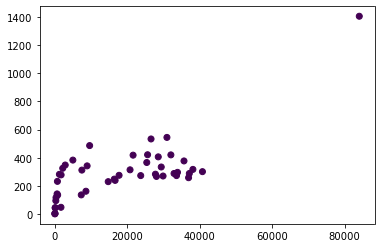

In [64]:
plt.scatter(page_views['count'], page_views['nunique'], c=page_views.labels)
plt.show()

#### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


- I will need to check topics referenced after end date 

#### 7. Which lessons are least accessed?


<AxesSubplot:title={'center':'30 Least Commonly Requested Pages'}>

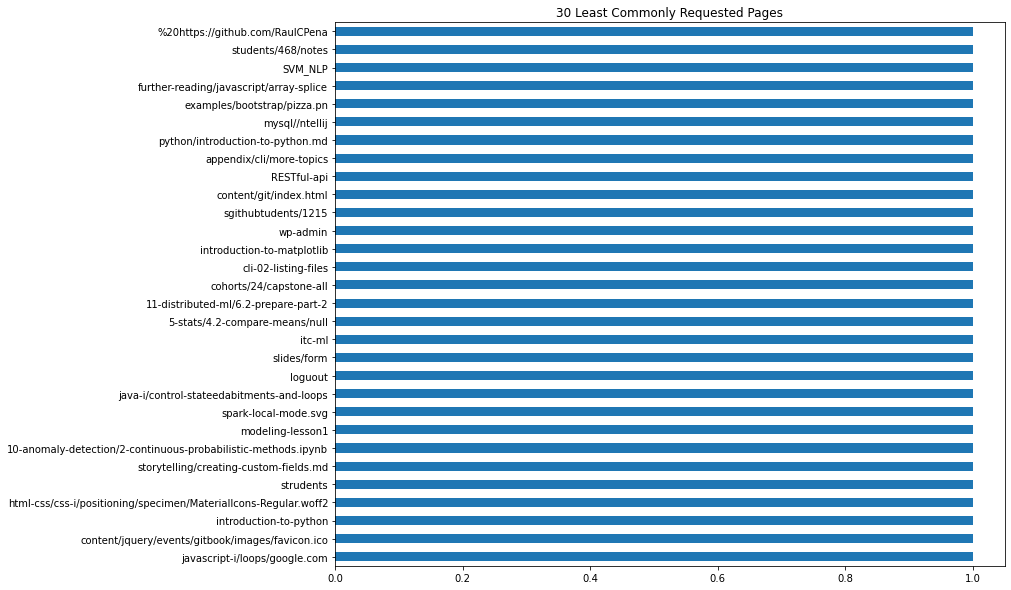

In [30]:
fig, ax = plt.subplots(figsize=(12,10))
df.path.value_counts().tail(30).plot.barh(
    title='30 Least Commonly Requested Pages',
)

#### 8. Anything else I should be aware of?

In [31]:
# get the counts of ips in the dataset

ip_df = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index().\
                rename(columns={'index': 'ip', 'ip': 'ip_count'})

In [32]:
ip_df.head(20)

,ip,ip_count
0,97.105.19.58,268648
1,97.105.19.61,60530
2,192.171.117.210,9124
3,71.150.217.33,6791
4,76.185.145.231,4754
5,12.106.208.194,4343
6,67.11.50.23,4181
7,70.112.179.142,4117
8,70.121.183.95,3843
9,172.124.67.93,3511


In [33]:
ip_df.tail(20)

,ip,ip_count
5180,107.77.218.168,1
5181,192.24.18.31,1
5182,172.58.111.66,1
5183,99.203.27.111,1
5184,187.237.231.85,1
5185,66.69.76.167,1
5186,107.77.219.202,1
5187,174.244.81.91,1
5188,107.181.165.202,1
5189,99.203.154.82,1


In [34]:
ip_df[ip_df['ip_count'] == 1].nunique()

ip          763
ip_count      1
dtype: int64